# Exercise E5-3: Non-Linear Regression by KNN

## Step 0: Introduction to the Theory

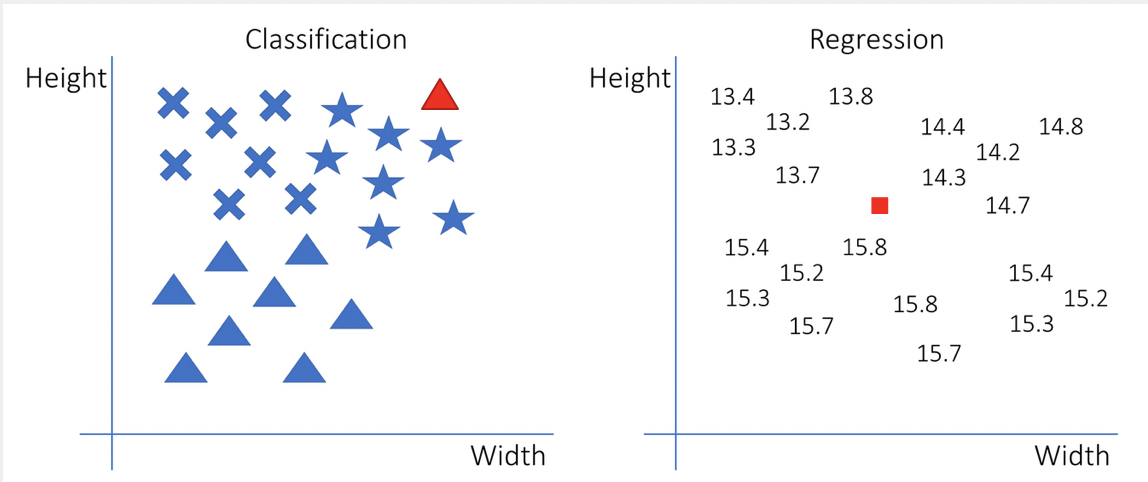

In [ ]:
# Embed a video
from IPython.display import Video, Audio, Image, YouTubeVideo

# reference to youtube video
id='3lp5CmSwrHI'

YouTubeVideo(id=id, width=600, height=300)

### Task
Abalones are small sea snails that look a bit like mussels. <br>
The age of an abalone matches to the number of rings seen inside the shell. By training and applying a  model, we can calculate the age without cutting the shell and killing the living abalone.<br>
Your task is to create a supervised machine learning model for predicting the age of an abalone from other measurable parameters, applying various regression methods,including the KNN method. 


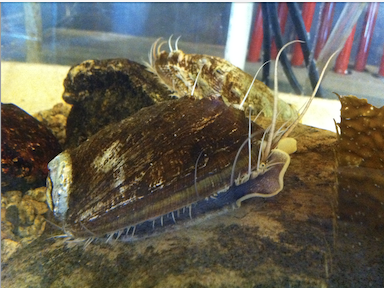 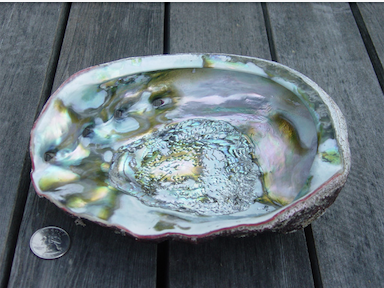

Images from<br>
up: By Sharktopus - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=14082271 <br>
down: CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=203608

## Step 1: Development Environment

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics as sm

from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Get acquainted with this huge data repository: https://archive.ics.uci.edu/ml/datasets.php. <br>
From there find, read about, and download the data source Abalone https://archive.ics.uci.edu/ml/datasets/Abalone.<br>
Rename your local version of the data file to abalone.csv and then use it for the example below.

In [ ]:
# load data
abalone = pd.read_csv("../../data/abalone.data", header=None, 
                      names=['Sex', 'Length', 'Diam', 'Heigh','Whole', 'Shucke', 'Viscera','Shell', 'Rings'])

In [ ]:
abalone.shape

## Step 2: Data Exploration and Preparation

In [ ]:
abalone.head()

In [ ]:
abalone.describe()

In [ ]:
# see the data types
abalone.info()

In [ ]:
# to check null values in data
abalone.isnull().sum()

In [ ]:
# remove the column (axis=1) "Sex" as categorical
abalone = abalone.drop("Sex", axis=1)

In [ ]:
# see the correlation between the features
corr_matrix = abalone.corr()
corr_matrix

In [ ]:
# plot the matrix as a heat map
plt.subplots(figsize = (8, 6))
sns.heatmap(corr_matrix, annot=True)

In [ ]:
corr_matrix["Rings"]

In [ ]:
abalone["Rings"].hist(bins=15)
plt.show()

In [ ]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
# plot the data
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
plt.xlabel('Rings')
plt.ylabel('Size')

points = ax.scatter(X[:, 6], X[:, 1], cmap=cmap)
# points = axts.scatter(X_test[:,0], X_test[:,1], X_test[:,2], y_test, cmap=cmap)
# points = axtr.scatter(X_train[:,0], X_train[:,1], X_train[:,2], y_train, cmap=cmap)
f.colorbar(points)

plt.show()


## Step 3: Train a Model

In [ ]:
k = 10

### Use numpy

In [ ]:
# add a new observation
new_data_point = np.array([0.569552, 0.446407, 0.154437, 1.016849, 0.439051, 0.222526, 0.291208])

In [ ]:
# find the distances from it to all training points
distances = np.linalg.norm(X - new_data_point, axis=1)
distances

In [ ]:
# sort the distances and take the 3 nearest
nearest_3NN = distances.argsort()[:k]
nearest_3NN

In [ ]:
# get their rings
nearest_rings = y[nearest_3NN]
nearest_rings

In [ ]:
# take their mean as a prediction for the rings of the new data point
prediction = nearest_rings.mean()
prediction

### Use scikit-learn

In [ ]:
# split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# you can add random_state=1 as a tool for always reproducing the same split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
y_train

In [ ]:
# create an instance of the KNN regression modeel for our experiment
knn_model = KNeighborsRegressor(n_neighbors=k)

In [ ]:
# fit the model to our train data
knn_model.fit(X_train, y_train)

In [ ]:
# plot the train set
plt.xlabel('Rings')
plt.ylabel('Size')

plt.scatter(X_train[:,6], X_train[:,1], y_train)

plt.show()

In [ ]:
# plot the train set
plt.xlabel('Rings')
plt.ylabel('Size')

plt.scatter(X_test[:,6], X_test[:,1], y_test)

plt.show()

## Step 4: Test the Model

In [ ]:
# test it with the test data
y_predicted = knn_model.predict(X_test)

### Estimate the Errors in Prediction

In [ ]:
# Mean Absolute Error (MAE) - the mean of the absolute value of the errors
mae = sm.mean_absolute_error(y_test, y_predicted)
mae

In [ ]:
# Mean Squared Error (MSE) - the mean of the squared errors
mse = sm.mean_squared_error(y_test, y_predicted)
mse

In [ ]:
# Root Mean Squared Error (RMSE) - the square root of the mean of the squared errors
rmse = sqrt(mse)
rmse

In [ ]:
# Explained variance score: 1 is perfect prediction
evs = sm.explained_variance_score(y_test, y_predicted)
evs

In [ ]:
# R-squared
R2 = sm.r2_score(y_test, y_predicted)
R2

## Step 5: Validation with New Data

In [ ]:
# add a new observation
new_data_point = np.array([0.569552, 0.446407, 0.154437, 1.016849, 0.439051, 0.222526, 0.291208]).reshape(1, -1)

In [ ]:
# predict Rings for it
new_rings = knn_model.predict(new_data_point)
new_rings

## Reference

https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html<br>
https://www.saedsayad.com/k_nearest_neighbors_reg.htm <br>
https://realpython.com/knn-python/<br>
https://www.youtube.com/watch?v=3lp5CmSwrHI
   